# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1YNYJR8iXuvmEgAZQYNmBpGQbc66Lkwnq/view?usp=sharing) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [7]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [8]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.3 MB/s eta 0:00:00


### Import Required Packages

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [10]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('/content/hr_employee_attrition_train.csv')

In [11]:
# kaggle dataset
#@title Download the datasets and install packages
from google.colab import drive
drive.mount('/content/drive')
!unzip -qq /content/drive/MyDrive/kaggel/b7-employee-attrition-prediction.zip

!pip install joblib

df = pd.read_csv('/content/hr_employee_attrition_train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
replace Sample_Submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [12]:
# Check the shape of dataframe.
# YOUR CODE HERE
print(df.shape)
print(df.info())
print(df.sample(5))

(1170, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1170 non-null   int64 
 1   businesstravel            1170 non-null   object
 2   dailyrate                 1170 non-null   int64 
 3   department                1170 non-null   object
 4   distancefromhome          1170 non-null   int64 
 5   education                 1170 non-null   int64 
 6   educationfield            1170 non-null   object
 7   employeecount             1170 non-null   int64 
 8   employeenumber            1170 non-null   int64 
 9   environmentsatisfaction   1170 non-null   int64 
 10  gender                    1170 non-null   object
 11  hourlyrate                1170 non-null   int64 
 12  jobinvolvement            1170 non-null   int64 
 13  joblevel                  1170 non-null   int64 
 14  jobrole      

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [13]:
# YOUR CODE HERE
print(df.info())

df.isna().sum()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1170 non-null   int64 
 1   businesstravel            1170 non-null   object
 2   dailyrate                 1170 non-null   int64 
 3   department                1170 non-null   object
 4   distancefromhome          1170 non-null   int64 
 5   education                 1170 non-null   int64 
 6   educationfield            1170 non-null   object
 7   employeecount             1170 non-null   int64 
 8   employeenumber            1170 non-null   int64 
 9   environmentsatisfaction   1170 non-null   int64 
 10  gender                    1170 non-null   object
 11  hourlyrate                1170 non-null   int64 
 12  jobinvolvement            1170 non-null   int64 
 13  joblevel                  1170 non-null   int64 
 14  jobrole                 

age                         0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithc

In [14]:
df.nunique()

age                           43
businesstravel                 3
dailyrate                    778
department                     3
distancefromhome              29
education                      5
educationfield                 6
employeecount                  1
employeenumber              1170
environmentsatisfaction        4
gender                         2
hourlyrate                    71
jobinvolvement                 4
joblevel                       5
jobrole                        9
jobsatisfaction                4
maritalstatus                  3
monthlyincome               1097
monthlyrate                 1149
numcompaniesworked            10
over18                         1
overtime                       2
percentsalaryhike             15
performancerating              2
relationshipsatisfaction       4
standardhours                  1
stockoptionlevel               4
totalworkingyears             40
trainingtimeslastyear          7
worklifebalance                4
yearsatcom

In [15]:
categorical, numerical = [],[]

for c in df.columns:
    if df[c].nunique() > 20:
        numerical.append(c)
    else:
        categorical.append(c)

print(f'Numerical Features: {numerical}')
print(f'categorical Features: {categorical}')

Numerical Features: ['age', 'dailyrate', 'distancefromhome', 'employeenumber', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'totalworkingyears', 'yearsatcompany']
categorical Features: ['businesstravel', 'department', 'education', 'educationfield', 'employeecount', 'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager', 'attrition']


<Axes: >

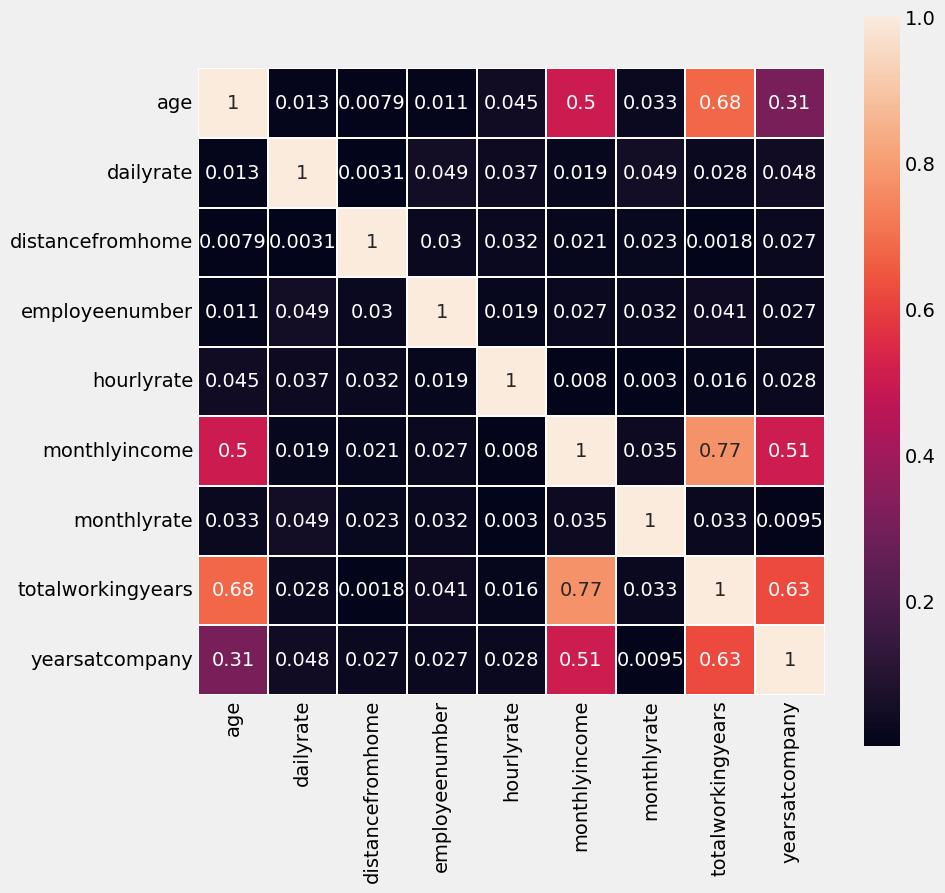

In [16]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(data=abs(df[numerical].corr()), annot=True, square=True, ax=ax, linewidths=0.25)


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

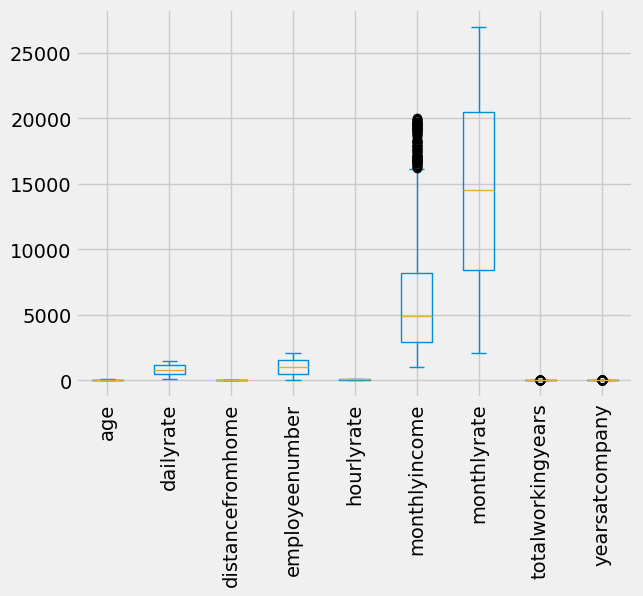

In [17]:
# Check for outliers
# YOUR CODE HERE
# draw the boxplot to check for any outliers in numerical data
df[numerical].plot(kind='box')
plt.xticks(rotation=90)
plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [18]:
# YOUR CODE HERE
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.0,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.00000,1170.000000,1170.000000
mean,36.858120,797.822222,9.262393,2.917949,1.0,1021.113675,2.723932,65.501709,2.747009,2.049573,2.723077,6456.937607,14411.584615,2.750427,15.204274,3.153846,2.739316,80.0,0.785470,11.315385,2.842735,2.745299,6.925641,4.17094,2.138462,4.061538
std,9.183448,403.592661,8.150868,1.011534,0.0,600.548289,1.095847,20.310054,0.702625,1.096352,1.103799,4660.476506,7078.167743,2.521952,3.688952,0.360955,1.075225,0.0,0.847253,7.879363,1.306385,0.718864,6.232076,3.62788,3.201738,3.586350
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,30.000000,461.000000,2.000000,2.000000,1.0,496.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2914.750000,8387.500000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,35.000000,798.000000,7.000000,3.000000,1.0,1008.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4903.500000,14536.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,43.000000,1146.750000,14.000000,4.000000,1.0,1548.500000,4.000000,83.000000,3.000000,3.000000,4.000000,8215.250000,20456.250000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.00000,2.750000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2065.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


In [19]:
# Recheck for outliers
# YOUR CODE HERE

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [20]:
# Count of unique values in Attrition column
# YOUR CODE HERE
df['attrition'].value_counts()

No     981
Yes    189
Name: attrition, dtype: int64

<Axes: >

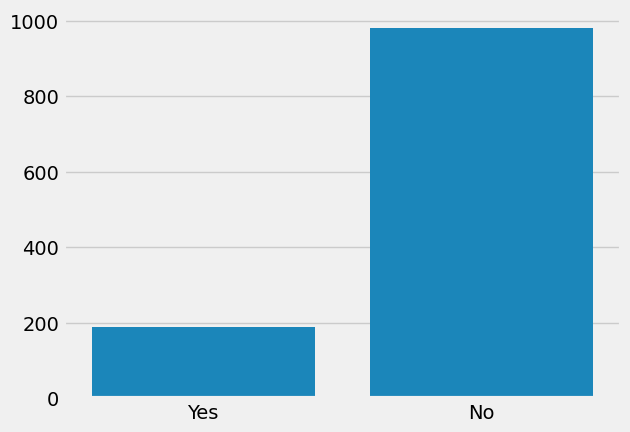

In [21]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
counts = [df['attrition'].value_counts()['Yes'],df['attrition'].value_counts()['No']]
sns.barplot(x=['Yes','No'], y=counts)

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [22]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
# sns.pairplot(data=df)

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

<Axes: >

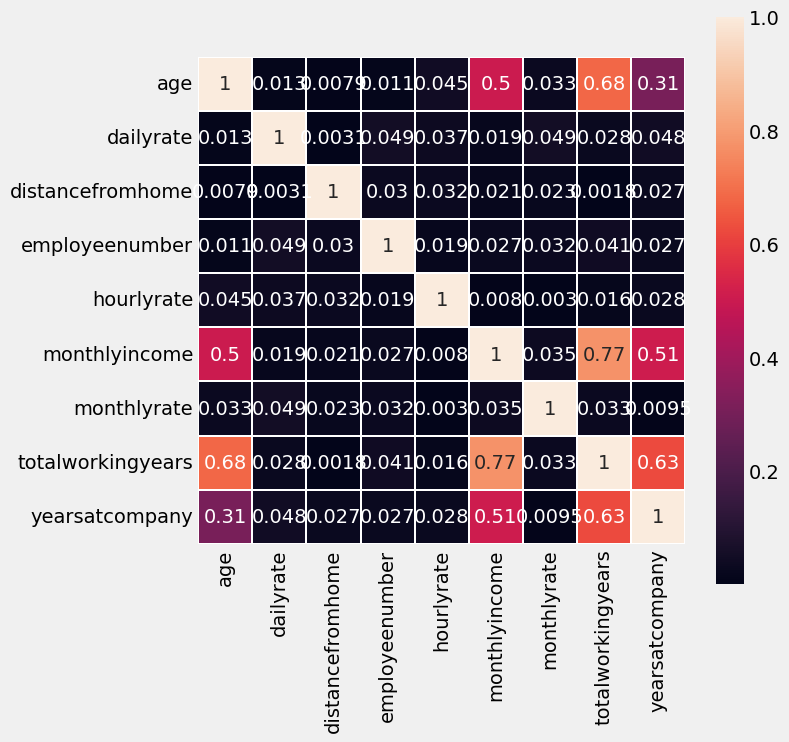

In [23]:
# Visualize heatmap
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=abs(df[numerical].corr()), annot=True, square=True, ax=ax, linewidths=0.25)

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [24]:
# YOUR CODE HERE
# encoding the target variable
# df['attrition'] = df['attrition'].apply(lambda x: x=='Yes')
df.attrition.info()

df[categorical].info()


<class 'pandas.core.series.Series'>
RangeIndex: 1170 entries, 0 to 1169
Series name: attrition
Non-Null Count  Dtype 
--------------  ----- 
1170 non-null   object
dtypes: object(1)
memory usage: 9.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   businesstravel            1170 non-null   object
 1   department                1170 non-null   object
 2   education                 1170 non-null   int64 
 3   educationfield            1170 non-null   object
 4   employeecount             1170 non-null   int64 
 5   environmentsatisfaction   1170 non-null   int64 
 6   gender                    1170 non-null   object
 7   jobinvolvement            1170 non-null   int64 
 8   joblevel                  1170 non-null   int64 
 9   jobrole                   1170 non-null   object
 10  jobsatisfaction           1170 non-n

Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning (CDS-B4 GDrive -> Module 2 -> Assignments -> Mar 04)

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [25]:
# Copy the data
df_cat = df.copy()
categorical.remove('attrition')


In [26]:
# Target Column
X = df_cat[[c for c in df_cat.columns if c!= 'attrition']]


In [27]:
# Feature Space
y = df_cat['attrition']

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [28]:
# Model training
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [29]:
scale_pos_weight = len(y_train[y_train=='No']) / len(y_train[y_train=='Yes'])

In [30]:
# Create CatBoost model
# YOUR CODE HERE
cat_clf = CatBoostClassifier(
                        scale_pos_weight=scale_pos_weight,
                        iterations=1000,
                        learning_rate=0.05,
                        max_depth=10
                        #loss_function='CrossEntropy'
                        )

In [31]:
cat_clf = CatBoostClassifier(
                        scale_pos_weight=scale_pos_weight,
                        )

### Model performance

In [32]:
# Model performance on all sets
# YOUR CODE HERE

cat_clf.fit(X_train, y_train, cat_features=categorical, verbose=False)

y_pred = cat_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.8846153846153846

In [33]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss

print(classification_report(y_test, y_pred))

probability_predictions = cat_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probability_predictions[:,1])
print(f'ROC AUC: {roc_auc}')

log_loss_value = log_loss(y_test, probability_predictions[:,1])
print(f'Log Loss: {log_loss_value}')


              precision    recall  f1-score   support

          No       0.92      0.95      0.93       198
         Yes       0.66      0.53      0.58        36

    accuracy                           0.88       234
   macro avg       0.79      0.74      0.76       234
weighted avg       0.88      0.88      0.88       234

ROC AUC: 0.875
Log Loss: 0.3298414707586915


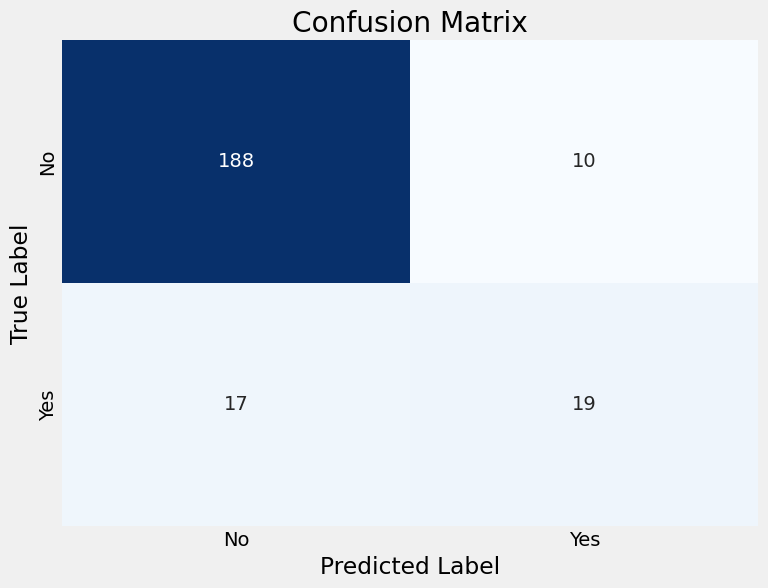

In [34]:
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
from catboost import cv, Pool


clf_cv = CatBoostClassifier(scale_pos_weight=scale_pos_weight, cat_features=categorical)

params = {'iterations': [100,500,1000],
          'max_depth': [5, 10, 15],
          'loss_function': ['Logloss'],
        #   'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
#           'eval_metric': ['Accuracy'],
#           'use_best_model': ['True'],
          'logging_level':['Silent'],
          'random_seed': [42]
         }

# clf_grid = GridSearchCV(estimator=clf_cv, param_grid=params, cv=5)
# clf_grid.fit(X_train, y_train)
# best_param = clf_grid.best_params_
# best_param

## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [105]:
# Copy dataframe
# YOUR CODE HERE
df_xgb = df.copy()

**Hint:** Use pd.get_dummies

In [106]:
# Handling categorical features
# YOUR CODE HERE
categorical, dummy_categorical, numerical = [],[],[]

for c in df_xgb.columns:
    if df_xgb[c].nunique() > 20:
        numerical.append(c)
    elif df_xgb[c].nunique() > 10:
        categorical.append(c)
    else:
        dummy_categorical.append(c)

print(f'Numerical Features: {numerical}')
print(f'dummy categorical Features: {dummy_categorical}')
print(f'categorical Features: {categorical}')



Numerical Features: ['age', 'dailyrate', 'distancefromhome', 'employeenumber', 'hourlyrate', 'monthlyincome', 'monthlyrate', 'totalworkingyears', 'yearsatcompany']
dummy categorical Features: ['businesstravel', 'department', 'education', 'educationfield', 'employeecount', 'environmentsatisfaction', 'gender', 'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'numcompaniesworked', 'over18', 'overtime', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'trainingtimeslastyear', 'worklifebalance', 'attrition']
categorical Features: ['percentsalaryhike', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


In [107]:
def dummy_encode(df, cats):
    encoded_df = pd.get_dummies(df[cats], prefix_sep='_', drop_first = True)
    df = pd.concat([df, encoded_df], axis=1)
    df.drop(cats, axis=1, inplace=True)
    return df

In [108]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

df_xgb = dummy_encode(df_xgb, dummy_categorical)
print(df_xgb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                1170 non-null   int64
 1   dailyrate                          1170 non-null   int64
 2   distancefromhome                   1170 non-null   int64
 3   employeenumber                     1170 non-null   int64
 4   hourlyrate                         1170 non-null   int64
 5   monthlyincome                      1170 non-null   int64
 6   monthlyrate                        1170 non-null   int64
 7   percentsalaryhike                  1170 non-null   int64
 8   totalworkingyears                  1170 non-null   int64
 9   yearsatcompany                     1170 non-null   int64
 10  yearsincurrentrole                 1170 non-null   int64
 11  yearssincelastpromotion            1170 non-null   int64
 12  yearswithcurrmanager

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [111]:
# Rename target column
# YOUR CODE HERE
df_xgb.rename(columns={'attrition_Yes': 'attrition'}, inplace=True)

In [112]:
# Feature Space
# YOUR CODE HERE
features = list(df_xgb.columns)
features.remove('attrition')

# Targer label
# YOUR CODE HERE
target = ['attrition']

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [145]:
# Create XGBoost classifier model
# YOUR CODE HERE
# declare parameters
params = {
            # 'objective':'binary:logistic',
            # 'max_depth': 10,
            'alpha': 5,
            'learning_rate': 0.1,
            'n_estimators':1000,
            'scale_pos_weight': len(y_train[y_train==0])*4.0 / len(y_train[y_train==1]),
            'class_weight': {0: 10, 1: 90}
        }

# instantiate the classifier
xgb_clf = XGBClassifier(**params)

In [146]:
# Model training
from sklearn.utils.class_weight import compute_sample_weight

# YOUR CODE HERE
X = df_xgb[features]
y = df_xgb[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sample_weights = compute_sample_weight(
                                        class_weight='balanced',
                                        y=y_train
                                    )

xgb_clf.fit(X_train, y_train)


XGBClassifier(alpha=5, base_score=None, booster=None, callbacks=None,
              class_weight={0: 10, 1: 90}, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

### Model Performance

In [147]:
# Model performance on all sets
# YOUR CODE HERE
y_pred = xgb_clf.predict(X_test)

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.8333


In [148]:
from sklearn.metrics import classification_report, roc_auc_score, log_loss

print(classification_report(y_test, y_pred))

probability_predictions = xgb_clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probability_predictions[:,1])
print(f'ROC AUC: {roc_auc}')

log_loss_value = log_loss(y_test, probability_predictions[:,1])
print(f'Log Loss: {log_loss_value}')


              precision    recall  f1-score   support

           0       0.89      0.92      0.90       197
           1       0.47      0.38      0.42        37

    accuracy                           0.83       234
   macro avg       0.68      0.65      0.66       234
weighted avg       0.82      0.83      0.83       234

ROC AUC: 0.7195774454657704
Log Loss: 0.4069498599709627


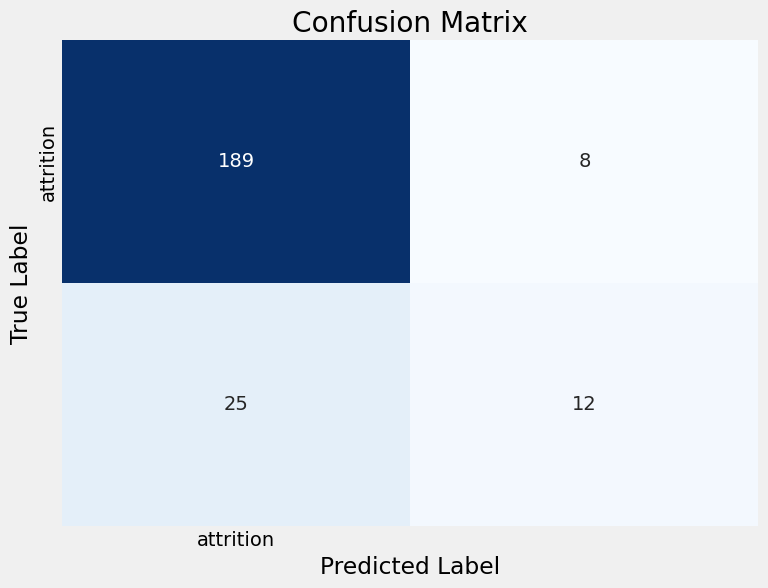

In [79]:
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

**Kaggle submission : catboost**

In [98]:
x_kaggle_test = pd.read_csv('/content/hr_employee_attrition_test.csv')
Ids = x_kaggle_test['id']
x_kaggle_test.drop(['id'], axis=1, inplace=True)
y_kaggle_pred_cat = cat_clf.predict(x_kaggle_test)

y_kaggle_pred_cat = [1 if i == 'Yes' else 0 for i in y_kaggle_pred_cat]

# Step 6: Save Predictions to CSV
output_df = pd.DataFrame({'id': Ids, 'label': y_kaggle_pred_cat})
output_df.to_csv('/content/Team11_Submission_cat.csv', index=False)


**Kaggle submission : XG Boost**

In [149]:
x_kaggle_test = pd.read_csv('/content/hr_employee_attrition_test.csv')
Ids = x_kaggle_test['id']
x_kaggle_test.drop(['id'], axis=1, inplace=True)

if 'attrition' in dummy_categorical:
    dummy_categorical.remove('attrition')

x_kaggle_test = dummy_encode(x_kaggle_test, dummy_categorical)

y_kaggle_pred_cat = xgb_clf.predict(x_kaggle_test)

y_kaggle_pred_cat = [1 if i == 'Yes' else 0 for i in y_kaggle_pred_cat]

# Step 6: Save Predictions to CSV
output_df = pd.DataFrame({'id': Ids, 'label': y_kaggle_pred_cat})
output_df.to_csv('/content/Team11_Submission_xgb.csv', index=False)


In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/